## Seaborn ile Veri Görselleştirme

1. Bar Plot
2. Count Plot
3. Box Plot
4. Swarm Plot
5. Joint Plot
6. Point Plot
7. Lm Plot
8. Kde Plot
9. Violin Plot

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Bar Plot

<AxesSubplot:xlabel='class', ylabel='fare'>

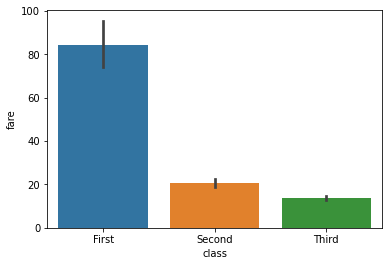

In [7]:
sns.barplot(x="class",y="fare",data=df)

In [8]:
df.groupby("class")["fare"].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

<AxesSubplot:xlabel='class', ylabel='fare'>

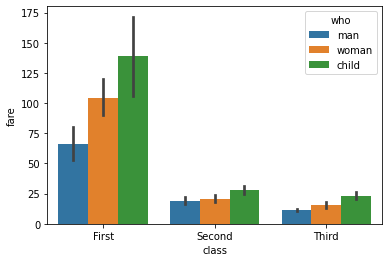

In [9]:
sns.barplot(x="class",y="fare",hue="who",data=df)

In [18]:
df[(df["class"]=="Third")&(df["who"]=="woman")]["fare"].mean()

15.354350877192978

<AxesSubplot:xlabel='class', ylabel='fare'>

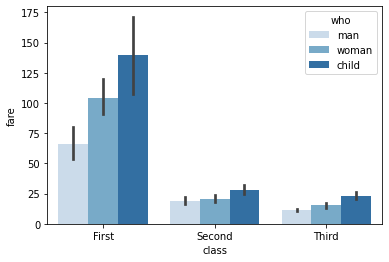

In [20]:
sns.barplot(x="class",y="fare",hue="who",data=df,palette="Blues")

### Count Plot

<AxesSubplot:xlabel='class', ylabel='count'>

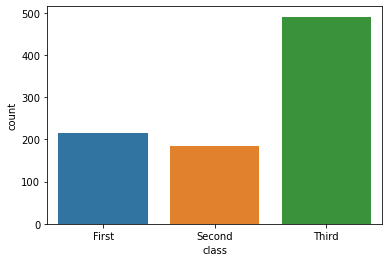

In [26]:
sns.countplot(x="class",data=df)

In [22]:
df.groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


<AxesSubplot:xlabel='class', ylabel='count'>

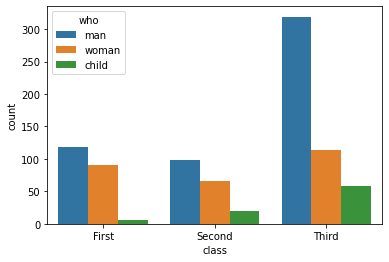

In [27]:
sns.countplot(x="class",hue="who",data=df)

In [36]:
df[(df["class"]=="Third")&(df["who"]=="child")]["fare"].count()

58

<AxesSubplot:xlabel='class', ylabel='count'>

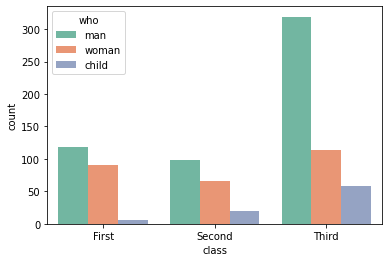

In [38]:
sns.countplot(x="class",hue="who",data=df,palette="Set2")

### Box Plot

<AxesSubplot:xlabel='fare'>

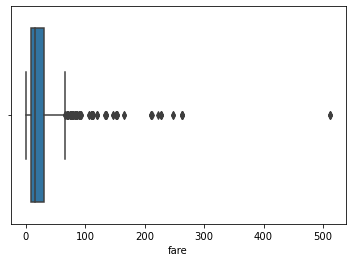

In [40]:
sns.boxplot(x="fare",data=df)

In [41]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

<AxesSubplot:xlabel='class', ylabel='fare'>

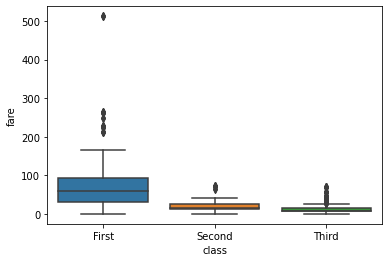

In [42]:
sns.boxplot(x="class",y="fare",data=df)

In [43]:
df.groupby("class")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
Second,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
Third,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


<AxesSubplot:xlabel='class', ylabel='fare'>

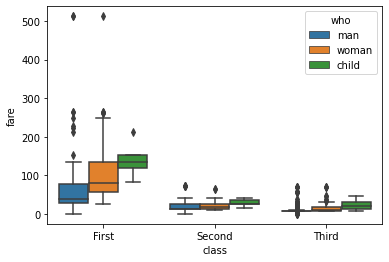

In [44]:
sns.boxplot(x="class",y="fare",hue="who",data=df)

In [47]:
df[(df["class"]=="Third")&(df["who"]=="child")]["fare"].describe()

count    58.000000
mean     23.220190
std      11.365095
min       7.225000
25%      13.676075
50%      21.075000
75%      31.275000
max      46.900000
Name: fare, dtype: float64

### Swarm Plot

C:\Users\olgun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='fare'>

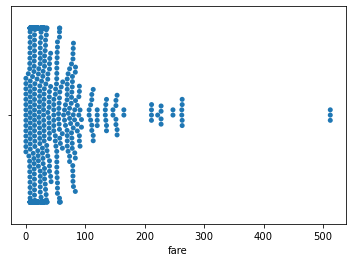

In [54]:
sns.swarmplot(x="fare",data=df)

C:\Users\olgun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\olgun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\olgun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='who', ylabel='fare'>

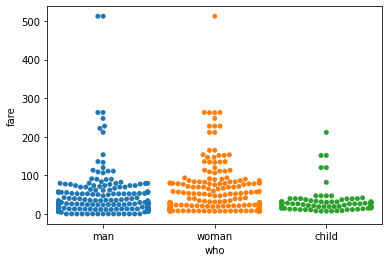

In [56]:
sns.swarmplot(x="who",y="fare",data=df)

C:\Users\olgun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\olgun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\olgun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='who', ylabel='fare'>

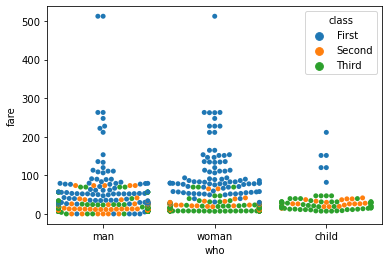

In [57]:
sns.swarmplot(x="who",y="fare",hue="class",data=df)

### Joint Plot

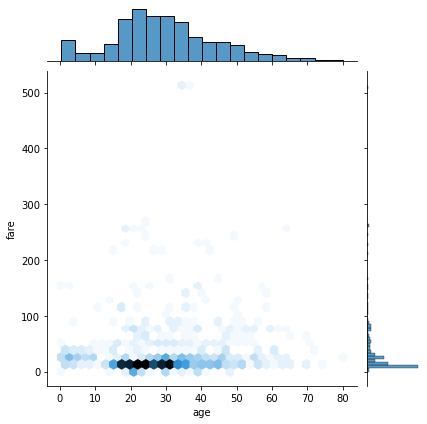

In [58]:
sns.jointplot(x="age",y="fare",kind="hex",data=df)

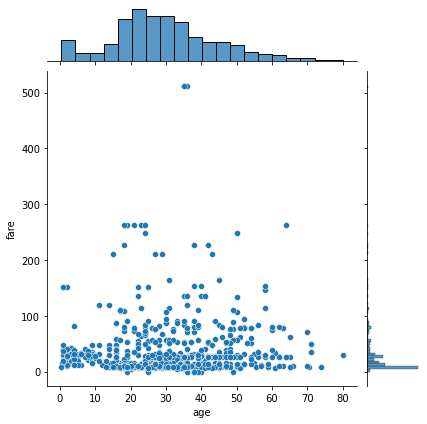

In [59]:
sns.jointplot(x="age",y="fare",kind="scatter",data=df)

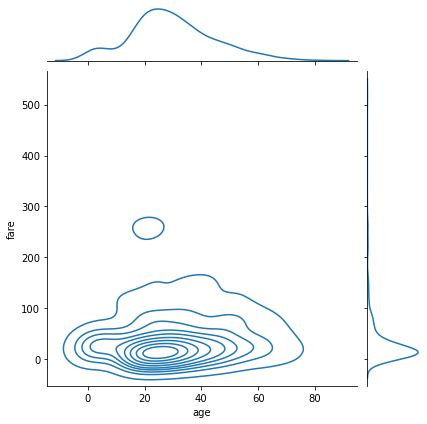

In [60]:
sns.jointplot(x="age",y="fare",kind="kde",data=df)

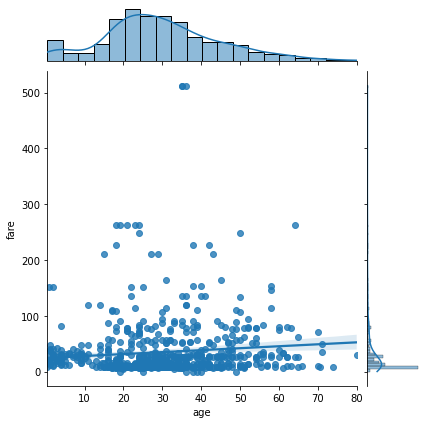

In [61]:
sns.jointplot(x="age",y="fare",kind="reg",data=df)

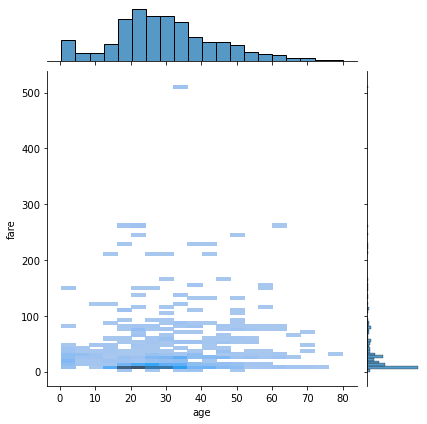

In [62]:
sns.jointplot(x="age",y="fare",kind="hist",data=df)

### Point Plot

<AxesSubplot:xlabel='who', ylabel='fare'>

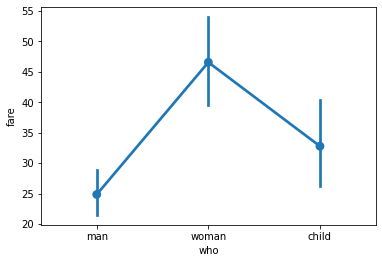

In [63]:
sns.pointplot(x="who",y="fare",data=df)

In [64]:
df.groupby("who")["fare"].mean()

who
child    32.785795
man      24.864182
woman    46.570711
Name: fare, dtype: float64

<AxesSubplot:xlabel='who', ylabel='fare'>

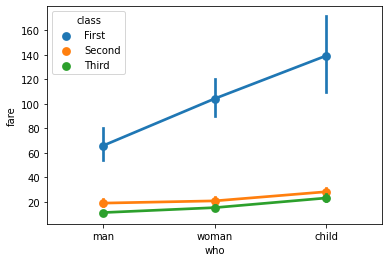

In [65]:
sns.pointplot(x="who",y="fare",hue="class",data=df)

In [70]:
df[(df["class"]=="Third")&(df["who"]=="child")]["fare"].mean()

23.2201896551724

### Lm Plot

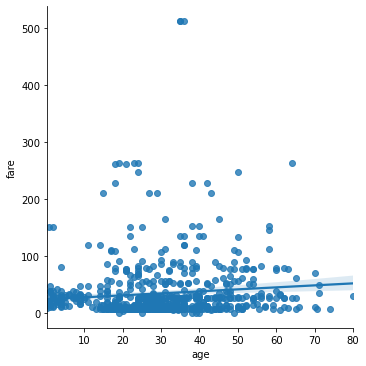

In [80]:
sns.lmplot(x="age",y="fare",data=df)

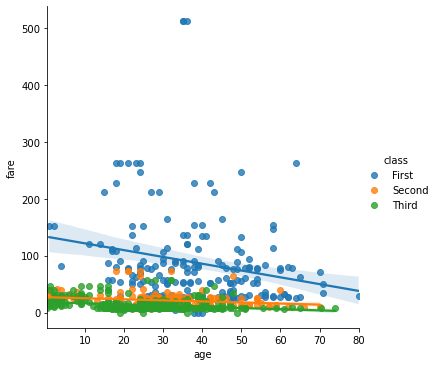

In [81]:
sns.lmplot(x="age",y="fare",hue="class",data=df)

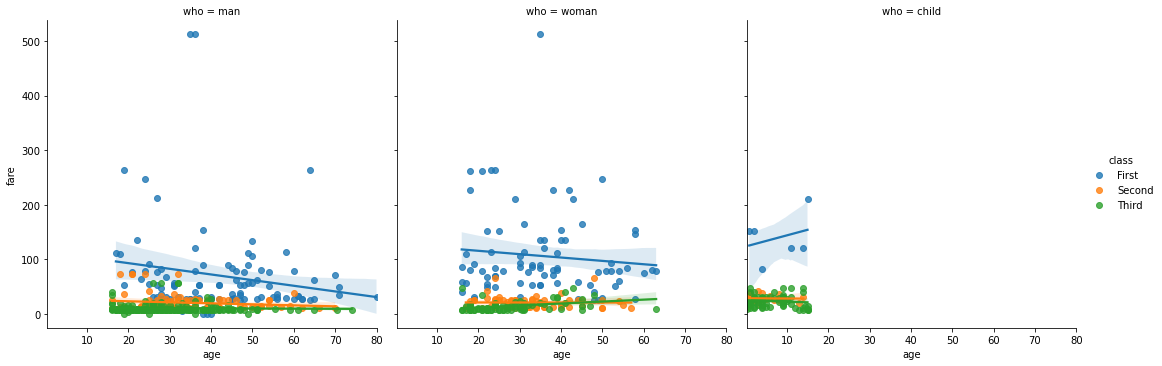

In [82]:
sns.lmplot(x="age",y="fare",hue="class",col="who",data=df)

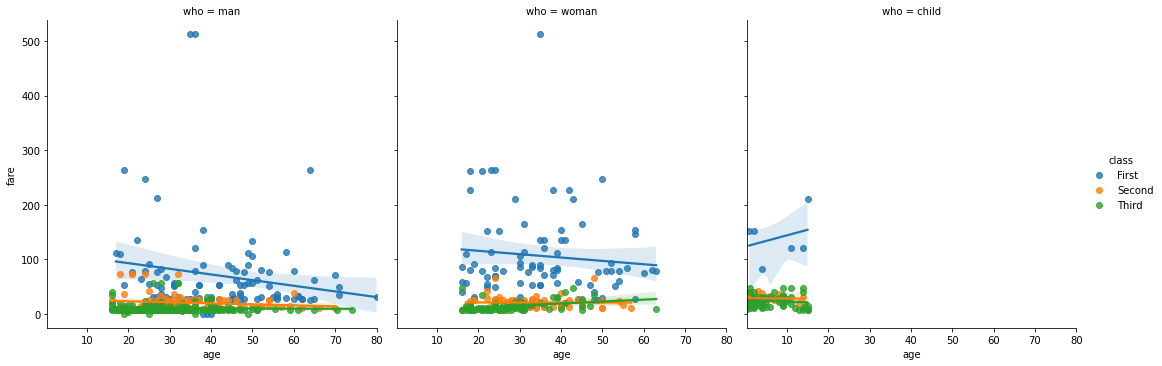

In [85]:
sns.lmplot(x="age",y="fare",hue="class",col="who",col_wrap=3,data=df)

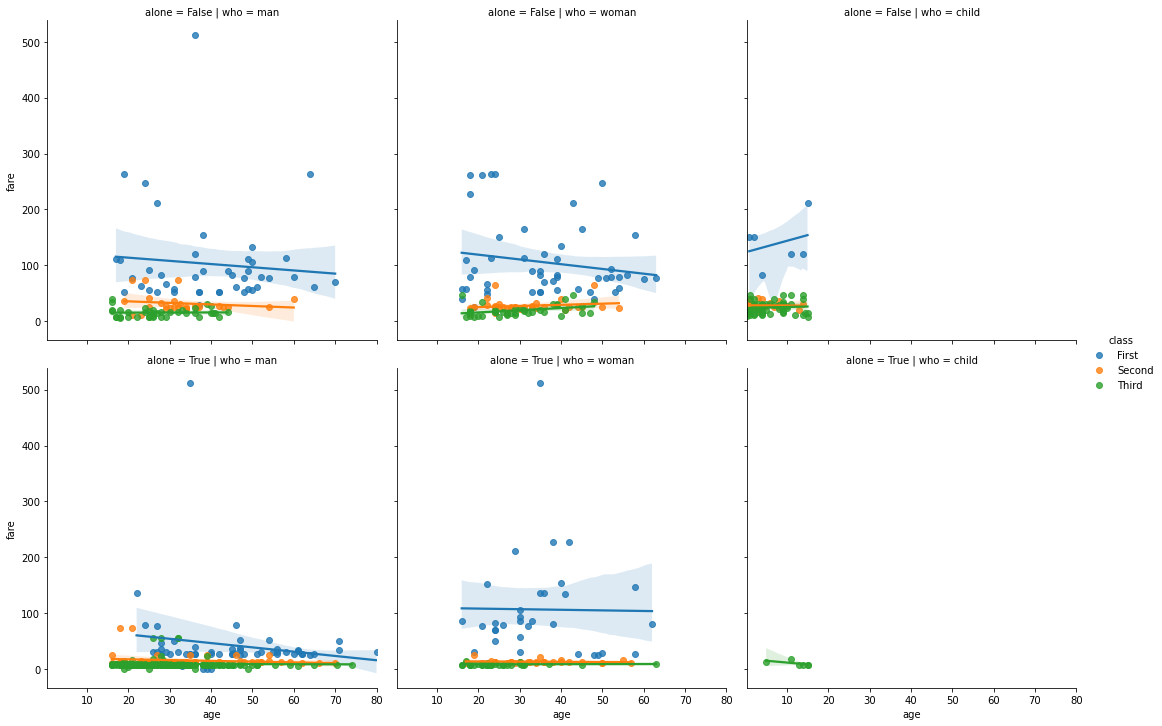

In [86]:
sns.lmplot(x="age",y="fare",hue="class",col="who",row="alone",data=df)

### Kde Plot

<AxesSubplot:xlabel='fare', ylabel='Density'>

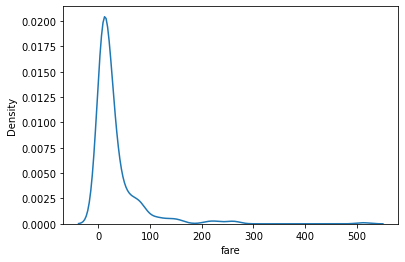

In [5]:
sns.kdeplot(x="fare",data=df)

<AxesSubplot:xlabel='fare', ylabel='Density'>

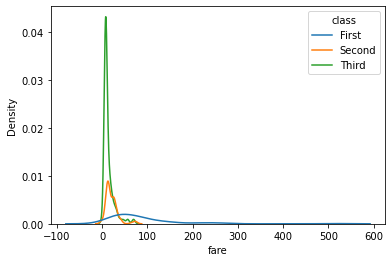

In [6]:
sns.kdeplot(x="fare",hue="class",data=df)

<AxesSubplot:xlabel='fare', ylabel='Density'>

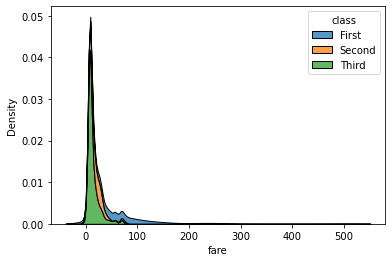

In [7]:
sns.kdeplot(x="fare",hue="class",data=df,multiple="stack")

<AxesSubplot:xlabel='fare', ylabel='age'>

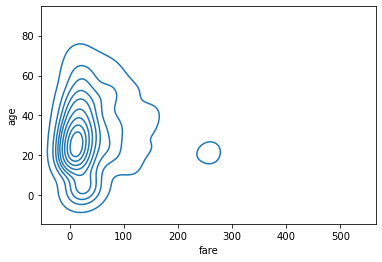

In [8]:
sns.kdeplot(x="fare",y="age",data=df)

<AxesSubplot:xlabel='fare', ylabel='age'>

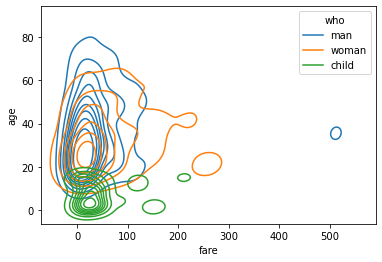

In [9]:
sns.kdeplot(x="fare",y="age",hue="who",data=df)

### Violin Plot

<AxesSubplot:xlabel='fare'>

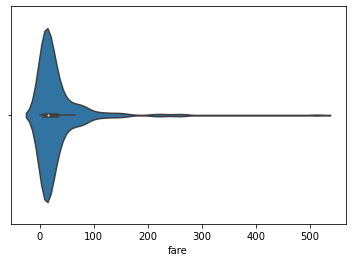

In [12]:
sns.violinplot(x="fare",data=df)

<AxesSubplot:xlabel='class', ylabel='fare'>

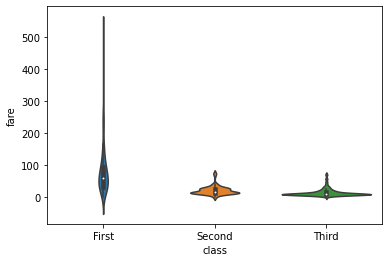

In [13]:
sns.violinplot(x="class",y="fare",data=df)

<AxesSubplot:xlabel='class', ylabel='fare'>

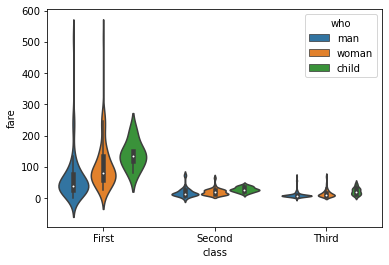

In [14]:
sns.violinplot(x="class",y="fare",hue="who",data=df)